# 8.6. Using a random forest to select important features for regression

In [1]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = skd.load_boston()

In [3]:
reg = ske.RandomForestRegressor()

In [4]:
X = data['data']
y = data['target']

In [5]:
reg.fit(X, y)

In [6]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

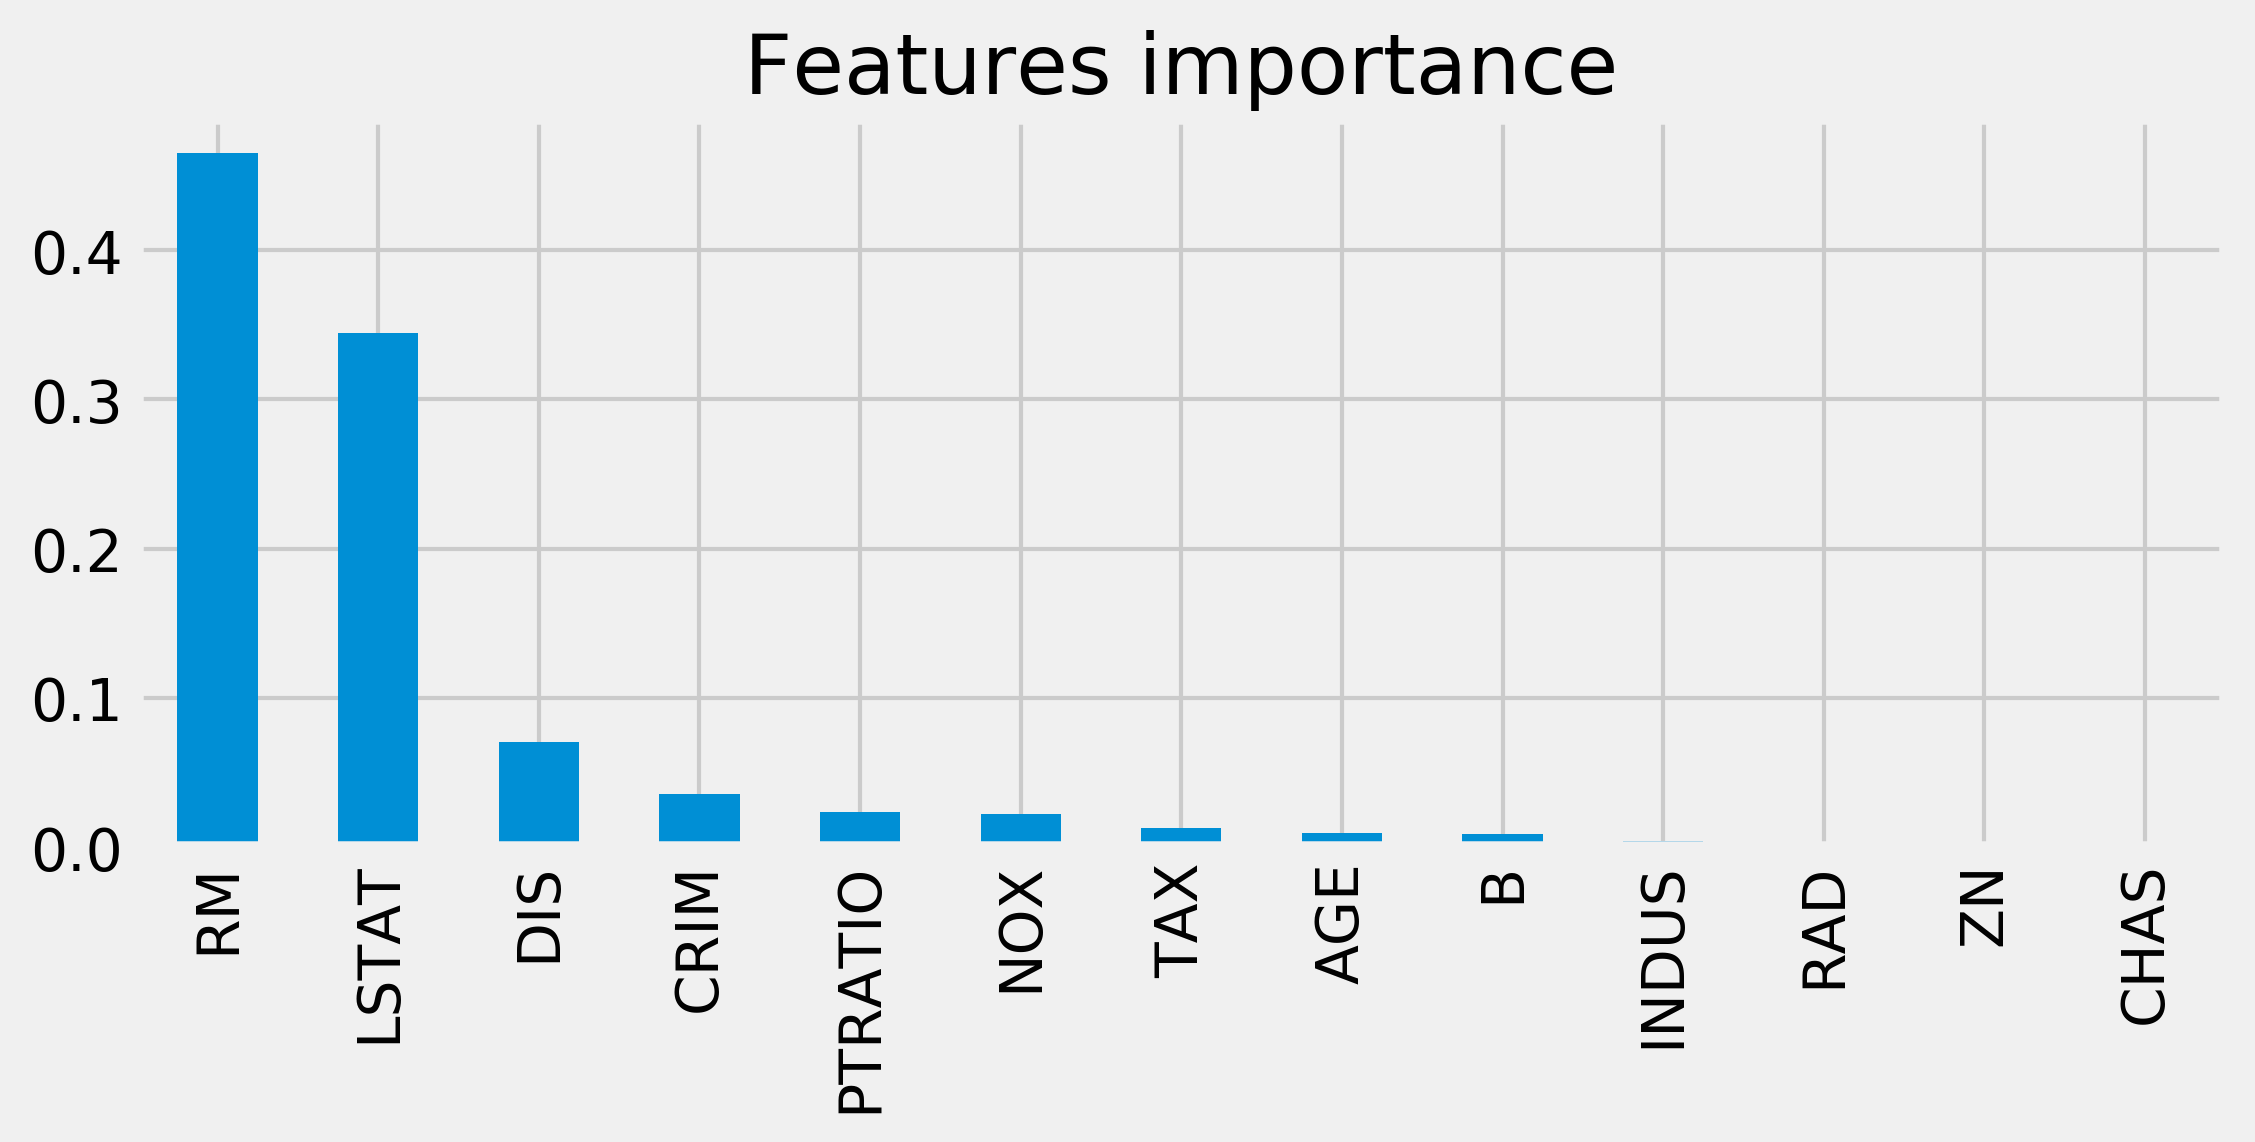

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data['feature_names'][fet_ind]
pd.Series(fet_imp, index=labels).plot('bar', ax=ax)
ax.set_title('Features importance')

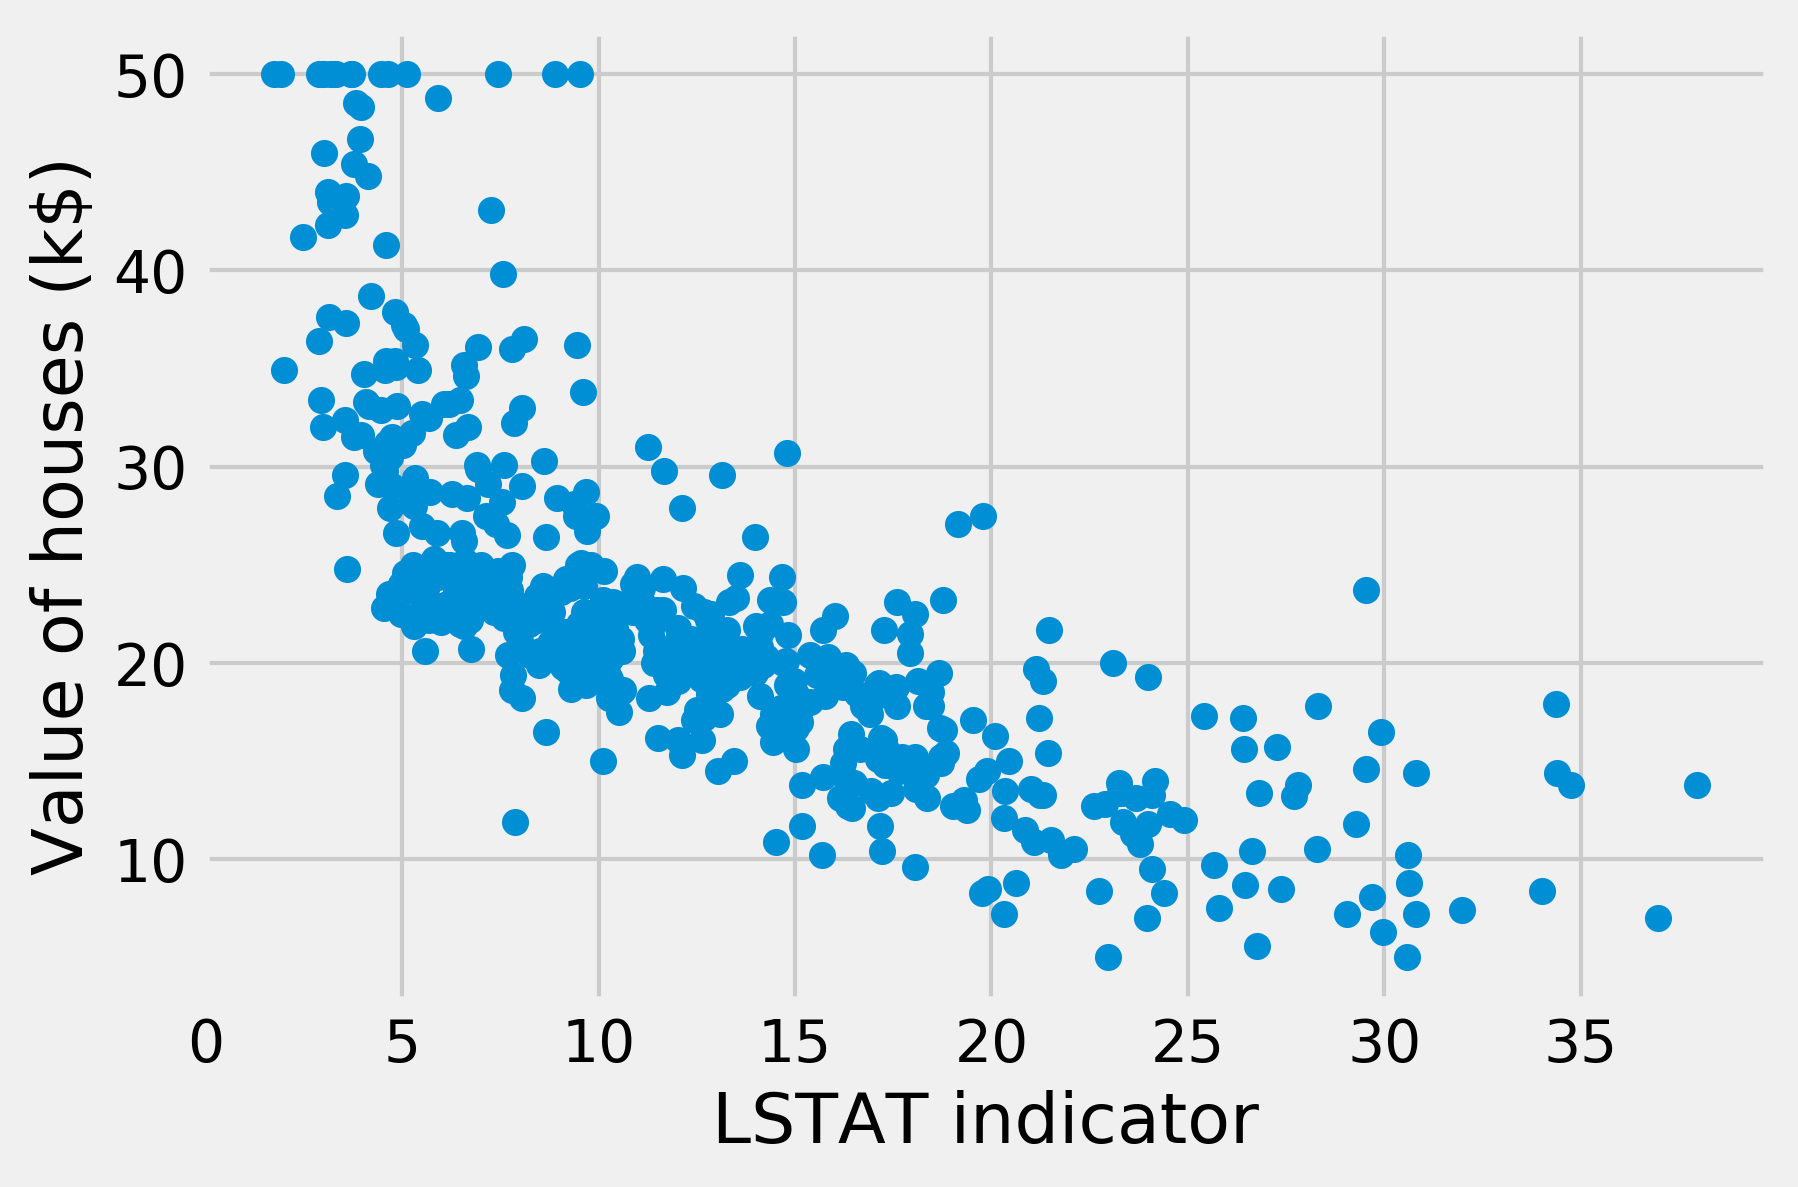

In [8]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses (k$)')

In [9]:
from sklearn import tree
tree.export_graphviz(reg.estimators_[0],
                     'tree.dot')